In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglog import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretraining import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv3 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m

In [3]:
bglog = BGLog(save_padded_num_sequences=False, load_from_pkl=True, )
train_test = bglog.get_tensor_train_test(ablation=1000)
train_data, test_data = train_test

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_padded_num_seq_df.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgltk.pkl
train_0:, 800
test_0:, 200
train_1:, 800
test_1:, 200
train_2:, 800
test_2:, 200
train_3:, 800
test_3:, 102
4 class does not have 800 records, it has only 628 records
test_4:, 0
5 class does not have 800 records, it has only 165 records
5 class does not have 200 records, it has only 165 records
6 class does not have 800 records, it has only 75 records
6 class does not have 200 records, it has only 75 records
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]]
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(32, 32, 64), dtype=tf.int32, name=None), TensorSpec(shape=(32, 4), dtype=tf.float32, name=None))>


In [4]:
line_encoder = LogLineEncoder(bglog, chars_in_line=64)
logSeqencer =  LogSeqEncoder(line_in_seq=32)
ptmodel = LogClassifier(line_encoder=line_encoder, seq_encoder=logSeqencer, num_classes=4)
ptmodel.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
hist = ptmodel.fit(train_data, validation_data=test_data, epochs=20) 

vocab_size: 50
Epoch 1/20
100/100 [==============================] - 10s 97ms/step - loss: 0.4636 - accuracy: 0.8128 - precision: 0.8919 - recall: 0.7347 - val_loss: 0.0431 - val_accuracy: 0.9866 - val_precision: 0.9896 - val_recall: 0.9866
Epoch 2/20
100/100 [==============================] - 10s 97ms/step - loss: 0.0713 - accuracy: 0.9787 - precision: 0.9787 - recall: 0.9772 - val_loss: 0.0142 - val_accuracy: 0.9955 - val_precision: 0.9970 - val_recall: 0.9940
Epoch 3/20
100/100 [==============================] - 10s 99ms/step - loss: 0.0291 - accuracy: 0.9884 - precision: 0.9884 - recall: 0.9881 - val_loss: 0.0034 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/20
100/100 [==============================] - 10s 97ms/step - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9922 - recall: 0.9912 - val_loss: 0.0047 - val_accuracy: 0.9985 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/20
100/100 [==============================] - 10s 95ms/step - loss: 0.008

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 1/50, train_loss: 7.55519962310791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 2/50, train_loss: 7.555205821990967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 3/50, train_loss: 7.555202007293701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 4/50, train_loss: 7.555212497711182


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.15it/s]


epoch: 5/50, train_loss: 7.555215358734131


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.21it/s]


epoch: 6/50, train_loss: 7.555196762084961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27it/s]


epoch: 7/50, train_loss: 7.555200576782227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.48it/s]


epoch: 8/50, train_loss: 7.555204391479492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 9/50, train_loss: 7.555203914642334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 10/50, train_loss: 7.555209159851074


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 11/50, train_loss: 7.555212020874023


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 12/50, train_loss: 7.555203437805176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 13/50, train_loss: 7.555206775665283


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 14/50, train_loss: 7.555201530456543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 15/50, train_loss: 7.555208683013916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 16/50, train_loss: 7.555201530456543


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 17/50, train_loss: 7.5552077293396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 18/50, train_loss: 7.555203437805176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 19/50, train_loss: 7.555212020874023


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


epoch: 20/50, train_loss: 7.555195331573486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.43it/s]


epoch: 21/50, train_loss: 7.555200576782227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 22/50, train_loss: 7.5552077293396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 23/50, train_loss: 7.555197238922119


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 24/50, train_loss: 7.5552077293396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 25/50, train_loss: 7.555210113525391


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


epoch: 26/50, train_loss: 7.555206298828125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 27/50, train_loss: 7.555204391479492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 28/50, train_loss: 7.555210113525391


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 29/50, train_loss: 7.555210113525391


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 30/50, train_loss: 7.55519962310791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.47it/s]


epoch: 31/50, train_loss: 7.555208206176758


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 32/50, train_loss: 7.555212497711182


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 33/50, train_loss: 7.555200099945068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51it/s]


epoch: 34/50, train_loss: 7.555205821990967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.32it/s]


epoch: 35/50, train_loss: 7.555208206176758


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 36/50, train_loss: 7.555200576782227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 37/50, train_loss: 7.555215358734131


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 38/50, train_loss: 7.555210113525391


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.50it/s]


epoch: 39/50, train_loss: 7.55519962310791


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.53it/s]


epoch: 40/50, train_loss: 7.555212020874023


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.52it/s]


epoch: 41/50, train_loss: 7.555200099945068


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 42/50, train_loss: 7.555202007293701


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.22it/s]


epoch: 43/50, train_loss: 7.5551981925964355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.21it/s]


epoch: 44/50, train_loss: 7.555203914642334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.39it/s]


epoch: 45/50, train_loss: 7.55520486831665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 46/50, train_loss: 7.555208206176758


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 47/50, train_loss: 7.555203437805176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.45it/s]


epoch: 48/50, train_loss: 7.555208683013916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]


epoch: 49/50, train_loss: 7.555205821990967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46it/s]


epoch: 50/50, train_loss: 7.555206775665283


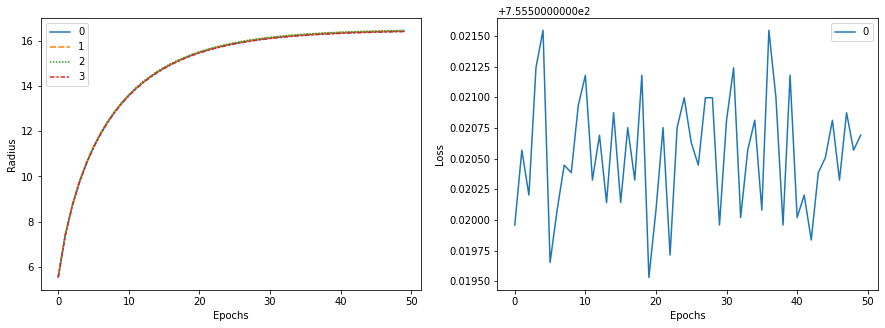

In [5]:
oset = OpenSet(4, ptmodel)
_, _ = oset.train(train_data, epochs=50, lr_rate = 5)
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
# print(oset.openpredict(oset.features))

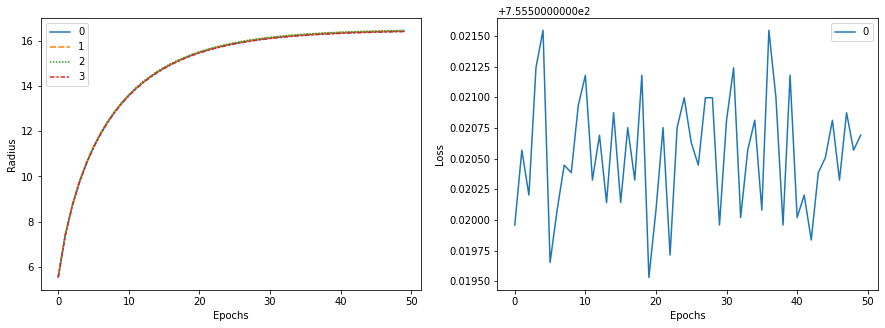

euc_dis: tf.Tensor(
[ 2.4626622  1.3750252 12.739506   7.574343  11.735225   6.168371
  2.216883   9.176048   6.92365   10.414392   2.138197   9.590059
 10.204818   2.1815228 25.158194   7.260772   6.8155656 12.623316
  8.194108   3.6718132  3.054308   2.6830812 12.607616   2.1368334
  2.2461061 22.766968   3.7312856  3.535359   2.415751  13.745861
 12.8896055  7.0729895], shape=(32,), dtype=float32)
pred_radius: tf.Tensor(
[16.422565 16.461756 16.443169 16.422565 16.404835 16.404835 16.461756
 16.461756 16.443169 16.443169 16.422565 16.404835 16.404835 16.422565
 16.422565 16.404835 16.404835 16.443169 16.443169 16.422565 16.422565
 16.422565 16.461756 16.461756 16.422565 16.422565 16.461756 16.422565
 16.422565 16.443169 16.461756 16.422565], shape=(32,), dtype=float32)
predictions with unknown-9999: [   0    2    1    0    3    3    2    2    1    1    0    3    3    0
 9999    3    3    1    1    0    0    0    2    2    0 9999    2    0
    0    1    2    0]


In [6]:
oset.plot_radius_chages()
# print(oset.radius_changes[0], oset.radius_changes[len(oset.radius_changes)-1])
preds = oset.openpredict(oset.features)

In [7]:
y_true, y_pred = oset.evaluate(train_data)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.17it/s]
C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhujay_ROG\venv1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[[800   0   0   0   0]
 [  0 615   0   0 185]
 [  0   0 792   0   8]
 [  0   0   0 736  64]
 [  0   0   0   0   0]]
91.97
f1_weighted: 0.9556415395588069, f1_macro: 0.7645132316470457, f1_micro: {f1_micro}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      0.77      0.87       800
           2       1.00      0.99      0.99       800
           3       1.00      0.92      0.96       800
        9999       0.00      0.00      0.00         0

    accuracy                           0.92      3200
   macro avg       0.80      0.74      0.76      3200
weighted avg       1.00      0.92      0.96      3200

